In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import copy

from arcmodelling_IDMC import tools
#from arcmodelling_IDMC import artificial_data_gen as adgen
#from arcmodelling import model_functions as mf
from arcmodelling_IDMC import model_fitting_tools as mftools

from importlib import reload as rel

# 5. Plot data with model

# Parameters

In [2]:
N = 100
sample_size=400000
dataset_path='N'+str(N)
sampled_datasets_path=os.path.join(dataset_path, 'sampled_datasets', '')

## Load data

In [5]:
dataset_intensity = np.load(os.path.join(sampled_datasets_path, 'intensity_sample_size_'+str(sample_size)+'.npy'))
dataset_gradient = np.load(os.path.join(sampled_datasets_path, 'gradient_sample_size_'+str(sample_size)+'.npy'))
dataset = mftools.RealDataSet(x_data=dataset_intensity, y_data=dataset_gradient)

### Plot data histogram

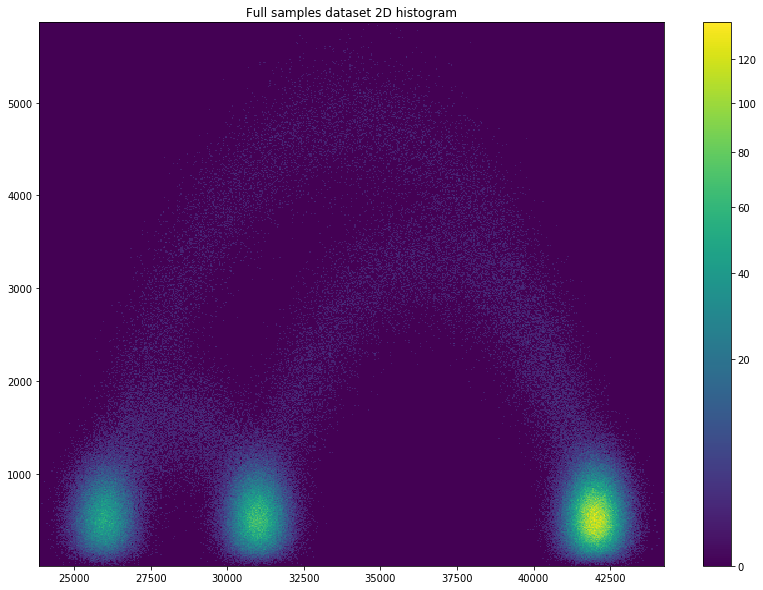

In [6]:
img=tools.plot_2D_histogram(dataset.x.numpy(), dataset.y.numpy(), nbins=500, set_colorbar=True, 
                           figsize=(14,10), cmap_gamma=0.5,cmap='viridis', title='Full samples dataset 2D histogram')
#plt.savefig('hist2D_synthetic_hist_GMM_small.png', dpi=400)

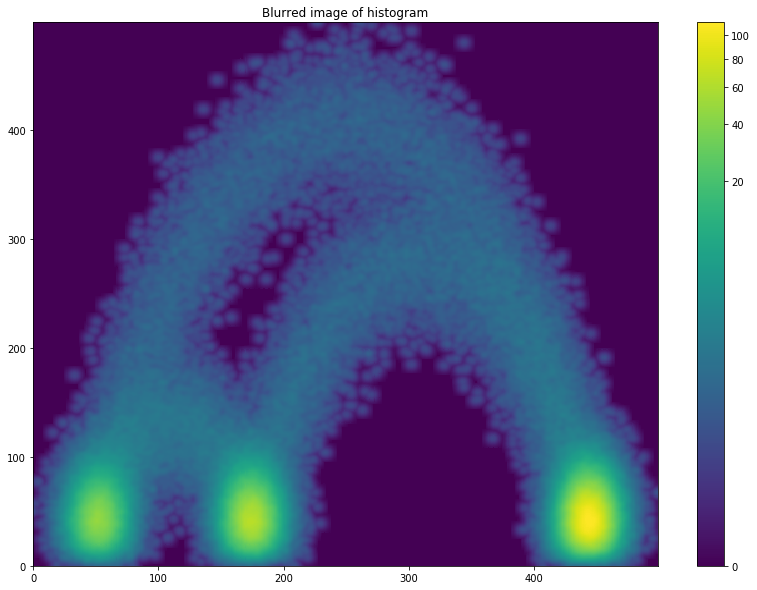

In [7]:
tools.plot_2D_image(snd.gaussian_filter(img, sigma=2), cmap_gamma=0.2, cmap='viridis', 
                    colorbar=True, figsize=(14, 10), axis='on', title='Blurred image of histogram')

In [17]:
rel(mftools)

<module 'arcmodelling.model_fitting_tools' from '/home/elbre/Documents/Arcmodelling_main/arcmodelling/arcmodelling/model_fitting_tools.py'>

## NB!!! BLIR no softmaxa før plotting..... triksa det til her berre

In [8]:
width_factor=4
n_MC_components=200

params_sampled_adjusted_for_plotting=copy.deepcopy(params_sampled)
ws0=[0.4975, 1.05, 0.125,  0.125,  0.125,  0.125 ]
params_sampled_adjusted_for_plotting['w']=ws0


ARCmodel = mftools.ArcModel3Phase(params_sampled_adjusted_for_plotting, width_factor, n_MC_components)

ARCmodel.print_params()

Ivals=np.linspace(dataset.minx.numpy(), dataset.maxx.numpy(), 200)
Gvals=np.linspace(dataset.miny.numpy(), dataset.maxy.numpy(), 200)

NameError: name 'params_sampled' is not defined

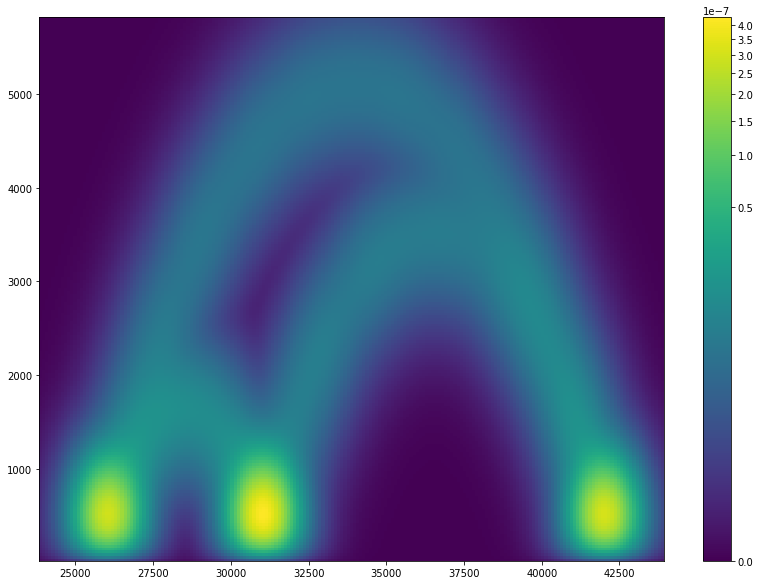

In [49]:
img=ARCmodel.plot_2D_gridplot(Ivals, Gvals, N_result=900, figsize=(14,10),cmap='viridis', title='', cmap_gamma=0.2)
#plt.savefig('hist2D_synthetic_model.png', dpi=300)

## Plot 1D model with data histograms

In [20]:
samplesize_to_plot=100000
sampled_data_intensity, sampled_data_gradient = dataset.sample(samplesize_to_plot)

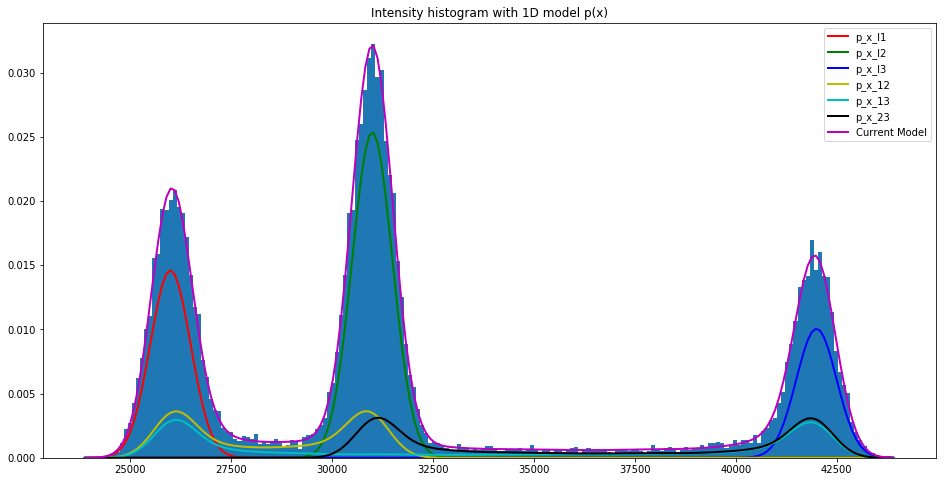

In [50]:
ARCmodel.plot_with_x_hist(sampled_data_intensity, nbins=200, individual_components=True)

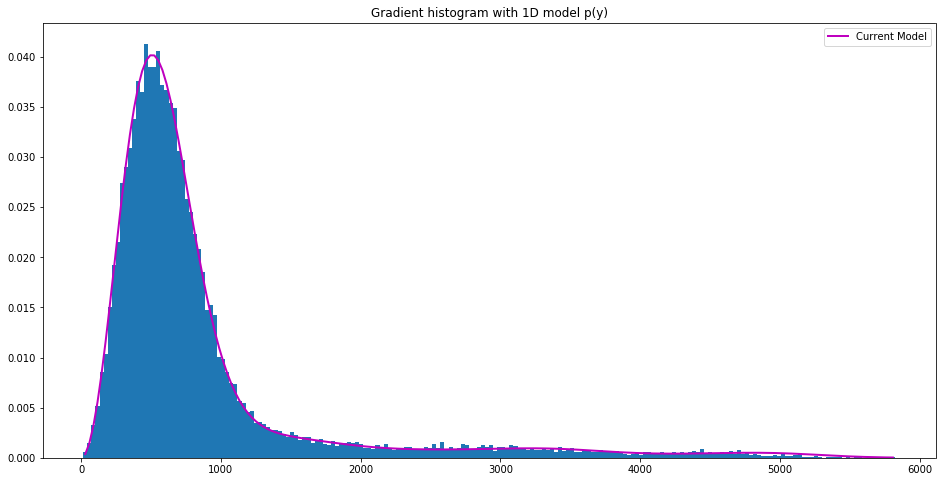

In [51]:
ARCmodel.plot_with_y_hist(sampled_data_gradient, nbins=200)

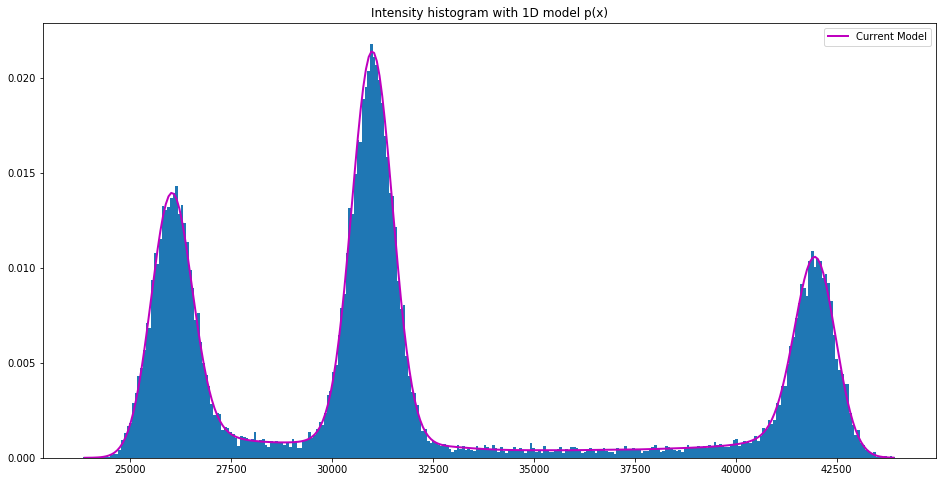

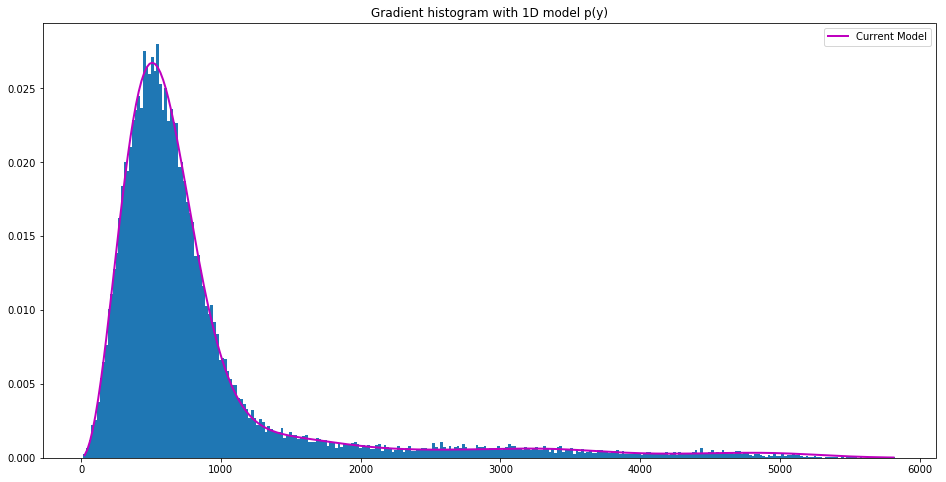

In [52]:
ARCmodel.plot_with_x_hist(dataset.x, nbins=300)
#plt.savefig('art_spheres_intensity_hist_with_model.pdf')
ARCmodel.plot_with_y_hist(dataset.y, nbins=300)
#plt.savefig('art_spheres_gradient_hist_with_model.pdf')